In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

import psycopg2;

In [2]:
conn = psycopg2.connect(dbname='COMPG011', host='127.0.0.1', user='postgres', password='password')
cur = conn.cursor()

In [3]:
cur.execute('''SELECT total_kills_headshot FROM csgo.profiles''')

rows = cur.fetchall()
col_names = [desc.name for desc in cur.description] 

In [4]:
df = pd.DataFrame(rows, columns = col_names)
df.dropna(axis=0, inplace=True)

In [5]:
headshots = np.flip(np.sort(df['total_kills_headshot']), axis=0)

In [6]:
mean = np.mean(headshots)
variance = np.var(headshots)
skew = scipy.stats.skew(headshots)
kurtosis = scipy.stats.kurtosis(headshots)

print('Mean: %s' %mean)
print('Variance: %s' %variance)
print('Skew: %s' %skew)
print('Kurtosis:  %s' % kurtosis)

Mean: 133758.020023
Variance: 1.3779589907e+14
Skew: 119.84603086758956
Kurtosis:  16114.88153756316


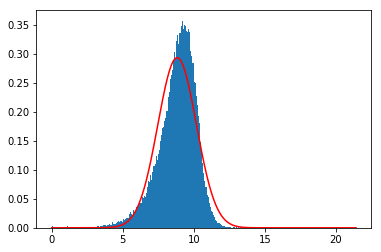

In [7]:
# Log data, calculate mean and std. dev.
data = np.log(headshots)

# Setup plot
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)

# Plot histogram
hist, bin_edges = np.histogram(data, bins='fd')
plt.hist(data, bins=bin_edges, normed=True)

# Plot gaussian curve
mean, std_dev = scipy.stats.norm.fit(data)

x_axis = np.linspace(min(data), max(data), 10000)
y_axis = scipy.stats.norm.pdf(x_axis, mean, std_dev)
plt.plot(x_axis, y_axis, color='red')

plt.show()

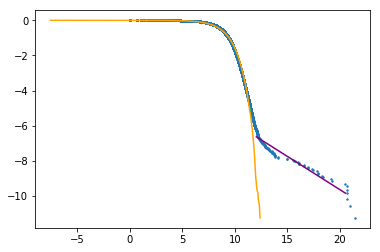

In [109]:
data_sorted = np.sort(data)

rank = np.log(np.flip(np.arange(1, len(data_sorted) + 1), axis=0) / (len(data_sorted) + 1))

# Setup plot
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)

# Plot points
plt.scatter(data_sorted, rank, s=2)

data_sorted = data_sorted[:-20]

# Plot gaussian
mean, std_dev = scipy.stats.norm.fit(data_sorted)
x_axis = np.sort(scipy.stats.norm.rvs(mean, std_dev, len(rank)))

#plt.plot(x_axis, rank, color='red')

# Plot gumbell
mean, std_dev = scipy.stats.gumbel_l.fit(data_sorted)
x_axis = np.sort(scipy.stats.gumbel_l.rvs(mean, std_dev, len(rank)))

plt.plot(x_axis, rank, color='orange')

# Plot weibull
params = scipy.stats.weibull_min.fit(data_sorted)
x_axis = np.sort(scipy.stats.weibull_min.rvs(params[0], params[1], params[2], len(rank)))

#plt.plot(x_axis, rank, color='green')

# Plot tail
lin_data = np.sort(data)[-145:-6]
lin_rank = rank[-145:-6]

slope, intercept = np.polyfit(lin_data, lin_rank, 1)

line_values = np.array([slope * i + intercept for i in lin_data])
plt.plot(lin_data, line_values, color='purple')

plt.show()

In [93]:
slope

1.0371014055302861

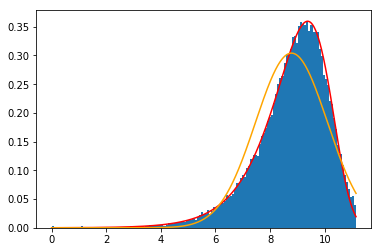

In [16]:
# Setup plot
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)

# Plot histogram
hist, bin_edges = np.histogram(data_sorted, bins='fd')
plt.hist(data_sorted, bins=bin_edges, normed=True)

# Plot gumbel curve
mean, std_dev = scipy.stats.gumbel_l.fit(data_sorted)

x_axis = np.linspace(min(data_sorted), max(data_sorted), 10000)
y_axis = scipy.stats.gumbel_l.pdf(x_axis, mean, std_dev)
#plt.plot(x_axis, y_axis, color='red')

# Plot weibull
params = scipy.stats.weibull_min.fit(data_sorted)

x_axis = np.linspace(min(data_sorted), max(data_sorted), 10000)
y_axis = scipy.stats.weibull_min.pdf(x_axis, params[0], params[1], params[2])
plt.plot(x_axis, y_axis, color='red')

# Plot gaussian curve
mean, std_dev = scipy.stats.norm.fit(data_sorted)

x_axis = np.linspace(min(data_sorted), max(data_sorted), 10000)
y_axis = scipy.stats.norm.pdf(x_axis, mean, std_dev)
plt.plot(x_axis, y_axis, color='orange')

plt.show()

In [215]:
scipy.stats.anderson(data_sorted, dist='gumbel_l')

AndersonResult(statistic=3.900804493096075, critical_values=array([ 0.474,  0.637,  0.756,  0.876,  1.037]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ]))

In [9]:
parameters = scipy.stats.weibull_min.fit(data_sorted)
scipy.stats.anderson(data_sorted, dist=)

In [10]:
parameters

(81994903.482728153, -83880556.213059485, 83880565.587423623)

In [18]:
params = scipy.stats.weibull_min.fit(data_sorted)
scipy.stats.kstest(data_sorted, cdf='weibull_min', args=params)

KstestResult(statistic=0.0044441697691355309, pvalue=0.10449553872831399)

In [122]:
data_sorted = np.sort(data)

pvalues = []
for clip_count in range(1, 2000):
    clipped_data = data_sorted[:-clip_count]
    
    params = scipy.stats.gumbel_l.fit(clipped_data)
    kst = scipy.stats.kstest(clipped_data, 'gumbel_l', params)
    
    pvalues.append((clip_count, kst.pvalue))
        
    if clip_count % 100 == 0:
        print('Finished iteration %i, %s' %(clip_count, kst))
        
print(min_kst, min_index)

Finished iteration 100, KstestResult(statistic=0.019018249518070962, pvalue=3.0434844507088908e-24)
Finished iteration 200, KstestResult(statistic=0.016205341897409298, pvalue=1.073196491636606e-17)
Finished iteration 300, KstestResult(statistic=0.014091122380433863, pvalue=1.8209524156620275e-13)
Finished iteration 400, KstestResult(statistic=0.012258828370543484, pvalue=2.7814740862314506e-10)
Finished iteration 500, KstestResult(statistic=0.010642880284520873, pvalue=7.6112776437689779e-08)
Finished iteration 600, KstestResult(statistic=0.0091613301775625988, pvalue=6.4664158047368651e-06)
Finished iteration 700, KstestResult(statistic=0.0080189422481719008, pvalue=0.00012593290415089252)
Finished iteration 800, KstestResult(statistic=0.0070752607135399215, pvalue=0.001084036885548644)
Finished iteration 900, KstestResult(statistic=0.0062619852519071317, pvalue=0.0055734487064586979)
Finished iteration 1000, KstestResult(statistic=0.0056029363644845009, pvalue=0.018127492221386415)


In [126]:
list(zip(*pvalues))[1]

(0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.3197507963150781e-296,
 1.1435945464712789e-259,
 1.5184269964718405e-223,
 3.7896892696485077e-196,
 1.3812030754526653e-168,
 3.8288873265459936e-148,
 5.8317639324193214e-127,
 5.5970583458973259e-111,
 2.2692691706282583e-95,
 4.0365038154933859e-85,
 8.0972077024292077e-75,
 2.6189808022096988e-64,
 4.3312878774640881e-55,
 7.0480722340773783e-48,
 4.0048010666061183e-45,
 1.2326002321750784e-42,
 2.711450697504929e-41,
 5.361397900773253e-40,
 2.115638772293091e-39,
 9.6709552201272427e-39,
 3.1324935948639558e-38,
 1.1232859298549839e-37,
 3.5322998442231408e-37,
 1.0910429068295029e-36,
 3.5203044054640357e-36,
 9.6751414312559049e-36,
 3.0587063723044165e-35,
 7.991697339649682e-35,
 1.9551319182594456e-34,
 4.6553201332389953e-34,
 1.0314410715472398e-33,
 2.5515251851724319e-33,
 5.2514859773989654e-33,
 9.9588680292920011e-33,
 2.1088740385785168e-32,
 4.159145035665004e-32,
 7.759509573107936e-32,
 1.5547

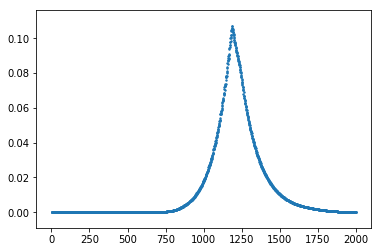

In [129]:
plt.scatter(range(1, len(pvalues) + 1), list(zip(*pvalues))[1], s=2)
plt.show()

In [110]:
cur.execute('''SELECT a.id, b.total_kills_headshot FROM csgo.ranks a, csgo.profiles b 
                WHERE a.id = b.rank_id AND 
                        b.total_kills_headshot IS NOT NULL AND
                        b.total_kills_headshot <= b.total_kills
                ORDER BY b.total_kills_headshot DESC''')

rows = cur.fetchall()
col_names = [desc.name for desc in cur.description]

In [113]:
df = pd.DataFrame(rows, columns = col_names)

In [112]:
for i in range(1, 19):
    print("Rank %i: median %f, mean %f" %(i, np.median(df[df.id == i].total_kills_headshot), np.mean(df[df.id == i].total_kills_headshot)))

Rank 1: median 952.000000, mean 2371.569729
Rank 2: median 2240.000000, mean 3067.677348
Rank 3: median 2620.000000, mean 3746.041815
Rank 4: median 2982.000000, mean 18692.984609
Rank 5: median 3437.000000, mean 4449.990172
Rank 6: median 3899.000000, mean 35314.383014
Rank 7: median 4656.500000, mean 5859.850202
Rank 8: median 5487.000000, mean 6933.175837
Rank 9: median 6224.000000, mean 7616.107580
Rank 10: median 7285.000000, mean 9281.824201
Rank 11: median 8781.000000, mean 22555.872724
Rank 12: median 10076.000000, mean 198340.401729
Rank 13: median 11630.000000, mean 208269.876726
Rank 14: median 13300.500000, mean 382442.064652
Rank 15: median 15661.000000, mean 40436.170927
Rank 16: median 18419.000000, mean 307587.264569
Rank 17: median 22041.000000, mean 26348.679380
Rank 18: median 30037.000000, mean 37910.376481


In [227]:
np.savetxt('test.out', data_sorted, delimiter='\n')

In [223]:
data_sorted

array([  0.        ,   0.        ,   0.        , ...,  11.1461136 ,
        11.14637333,  11.14700794])